# Визуализация событий

    Пн янв 14 16:30:40 MSK 2019
    /home/sphere/ExpData/2018/Data/2018_12_07-08_run2/Draw

In [1]:
!date
!pwd

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
#from matplotlib import dates
#import datetime as dt

plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 12

Пн янв 14 16:30:40 MSK 2019
/home/sphere/ExpData/2018/Data/2018_12_07-08_run2/Draw


In [5]:
data = pd.read_csv('../spectrums/data_to_analyze.csv', index_col=0)
data.head(2)

,EID,UTC,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,Amax,Fifo_err
162,23001,2018-12-07 21:20:09,L,5,1014,472,243,243,243,285,0
164,23003,2018-12-07 21:20:30,L,3,881,472,243,243,243,327,0


array([ 895.,  330.,  185.,  182.,  151.,   95.,   96.,   61.,   42.,
         23.,   18.,   14.,    9.,    7.,    2.,    2.,    3.,    2.,
          1.,    2.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    1.,    1.,    0.,    0.,    2.,    0.,    0.,
          1.,    0.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,
          0.,    1.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,
          0.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
          0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

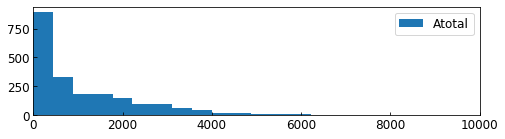

In [7]:
for x in ['Atotal']:
    plt.figure(figsize=(8,2))
    hists = plt.hist(data[x], 200, label = x)
    #plt.yscale('log')
    plt.xlim(0, 10000)
    plt.legend()
hists[0]

Выберем несколько ярких событий

In [267]:
minsum = 6000
maxsum = 8700
events = list(data.EID[(data.Atotal > minsum) & (data.Atotal < maxsum)])
print(len(events))
data[(data.Atotal > minsum) & (data.Atotal < maxsum)]

15


,EID,UTC,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,Amax,Fifo_err
182,23021,2018-12-07 21:23:02,L,3,6742,242,242,242,242,796,0
282,23121,2018-12-07 21:39:04,L,4,6325,242,242,242,242,746,0
292,23131,2018-12-07 21:39:58,L,10,7263,245,244,244,244,722,0
510,23349,2018-12-07 22:07:00,L,5,7354,242,242,242,242,805,0
868,23707,2018-12-07 22:40:07,L,4,6087,244,243,244,243,757,0
998,23837,2018-12-07 22:52:04,L,6,6040,243,242,242,242,835,0
1002,23841,2018-12-07 22:52:37,L,4,6091,244,244,244,244,724,0
1054,23893,2018-12-07 22:57:23,L,4,6587,242,242,242,242,819,0
1080,23919,2018-12-07 23:00:33,L,10,8500,246,244,244,244,825,0
2332,25171,2018-12-08 00:33:13,L,2,7795,472,244,244,244,448,0


In [18]:
data[(data.EID == 23131) | (data.EID == 23837) ]

,EID,UTC,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,Amax,Fifo_err
292,23131,2018-12-07 21:39:58,L,10,7263,245,244,244,244,722,0
998,23837,2018-12-07 22:52:04,L,6,6040,243,242,242,242,835,0


## Поканальные развертки

In [268]:
''' функция чтения события '''
def read_data_file(filename):
    try:
        frame = pd.read_csv(filename, header = None, index_col=0, sep='\s+', 
                            skiprows = 45, nrows = 800)

        off = [38, 39, 42, 43, 46, 47, 50, 51, 54, 55, 58, 59, 62, 63, 64]
        frame = frame.drop(columns = [x for x in off])
        frame = frame.drop(columns = [x for x in range(65,113)])
        return frame

    except Exception as e:
        errormsg = e.args[0]
        #errortype = errormsg.split('.')[0].strip()
        print(errormsg)
        return 'NULL'

In [269]:
## прочитать пьедесталы
''' чтение пьедесталов и коэффициентов для учета напряжения для событий '''

pied = pd.read_csv('../spectrums/piedestal01.csv', index_col=0)
print(len(pied))
pied[63:66]

2122


,EID,I_coef,p0_1,p1_1,p0_2,p1_2,p0_3,p1_3,p0_4,p1_4,...,p0_53,p1_53,p0_56,p1_56,p0_57,p1_57,p0_60,p1_60,p0_61,p1_61
63,23129,1.0,50.5,48.0,50.0,47.5,49.5,49.0,49.0,46.0,...,50.0,54.0,52.0,59.5,50.0,48.0,47.0,52.0,50.0,56.0
64,23131,1.0,50.0,49.0,49.0,47.0,50.0,50.0,50.0,46.0,...,49.0,54.0,50.0,59.0,50.0,48.0,47.0,51.5,50.0,57.0
65,23133,1.0,50.0,49.0,49.0,48.0,50.0,50.0,50.0,46.0,...,49.0,55.0,52.0,58.0,49.0,47.0,47.0,52.0,50.0,57.0


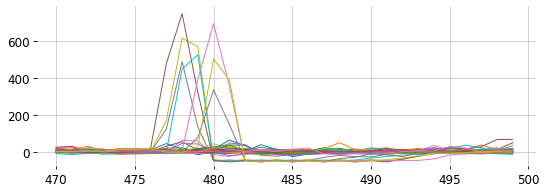

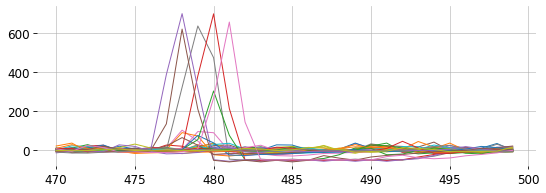

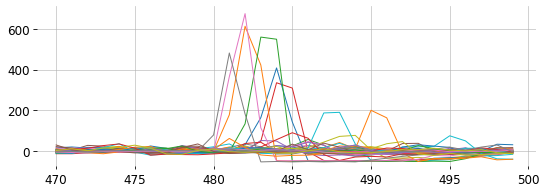

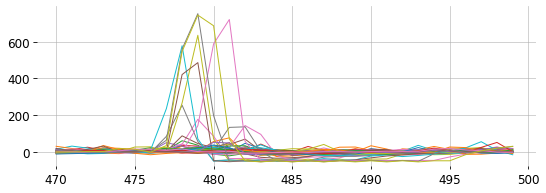

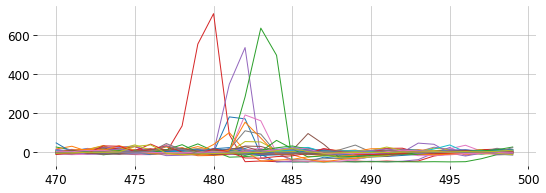

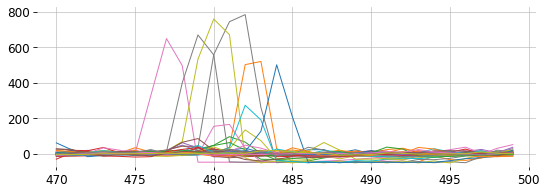

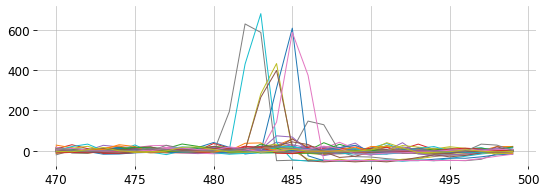

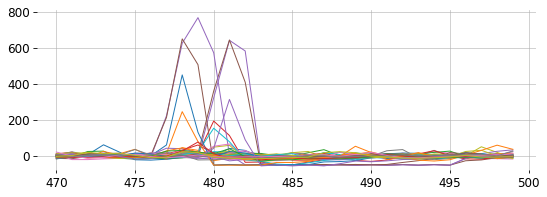

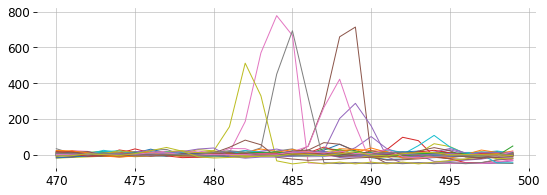

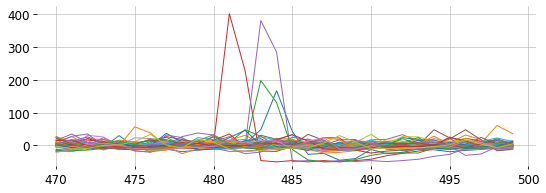

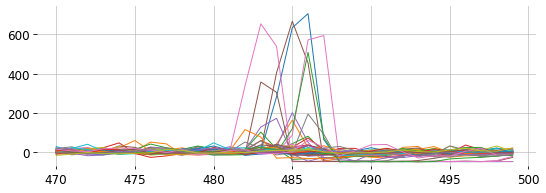

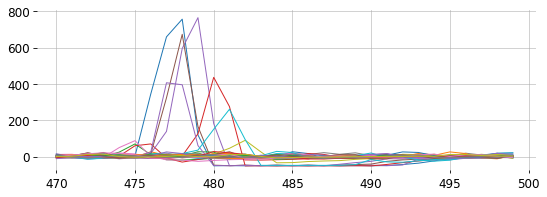

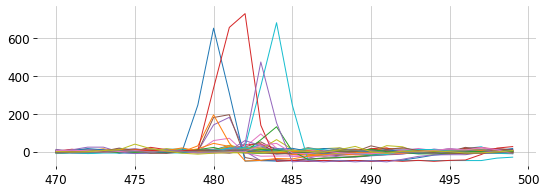

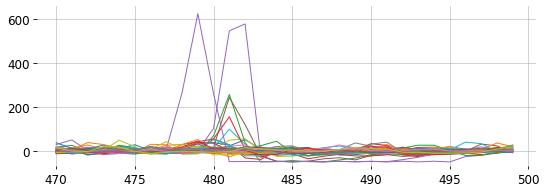

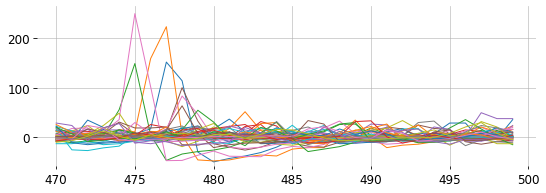

In [301]:
suma  = []
dirname = '../data.txt/'
startx,stopx = 460,490

for event in events:
    summ = [0.1] * 62
    fig = plt.figure(figsize=(9,3))
    
    ## прочитать событие
    filename = dirname + str(event) + '.txt'
    frame = read_data_file(filename) 

    # ''' new column with parity '''
    for j in frame.index:
        frame.loc[j,'par'] = int(j%2) 

    i = pied[pied.EID == event].index[0]
    for chan in frame.columns[:-1]:
        #print(chan)

        ## ''' minus piedestal '''
        p0 = pied.loc[i, 'p0_'+str(chan)]
        p1 = pied.loc[i, 'p1_'+str(chan)]

        datum = (frame[chan] - (1 - frame.par) * p0 - frame.par * p1)[startx:stopx]
        plt.plot(datum)

        x = sum(x for x in datum if x > 0)
        #print(chan, x)
        summ[chan-1] = x + 0.1

    plt.grid()
    suma.append(summ)

In [271]:
#print(suma)

## РИсунок

In [302]:
from matplotlib import colors

import retina49
x=retina49.x
y=retina49.y
C=retina49.C
#N=retina49.N
y = [
     2.5,2.5,
     3.0,3.0,3.0,3.0,3.0,
     3.5,3.5,3.5,3.5,3.5,3.5,3.5,
     4.0,4.0,4.0,4.0,4.0,4.0,4.0,
     4.5,4.5,4.5,4.5,4.5,4.5,4.5,
     5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,
     5.5,5.5,5.5,5.5,5.5,5.5,5.5,
     6.0,6.0,6.0,6.0,6.0,
     6.5,6.5
    ]
x = [ 
       11,13,
       6, 8,10,12,14,
       5, 7, 9,11,13,15,17,
       6, 8,10,12,14,16,18,
      5, 7, 9,11,13,15,17,
       4, 6, 8,10,12,14,16,18,
       5, 7, 9,11,13,15,17,
       8,10,12,14,16, 
       9,11
    ]
N = [
       56, 57, 
      53, 32, 33, 34, 35, 
      52, 31, 16, 17, 18, 36, 60, 
      30, 15,  6,  7, 19, 37, 61,
      29, 14,  5,  1,  2,  8, 20,
      49, 28, 13,  4,  3,  9, 21, 39,
      48, 27, 12, 11, 10, 22, 40,
      26, 25, 24, 23, 41, 
      45, 44
    ]
C = [ 127 for i in range(len(N))]
xmin = min(x)-3
xmax = max(x)+3
ymin = min(y)-1
ymax = max(y)+1
print(len(N))

50


In [303]:
title = [str(x) for x in events]
nn=len(title)

plt.rcParams['axes.linewidth'] = 0.0
plt.rcParams['font.size'] = 12

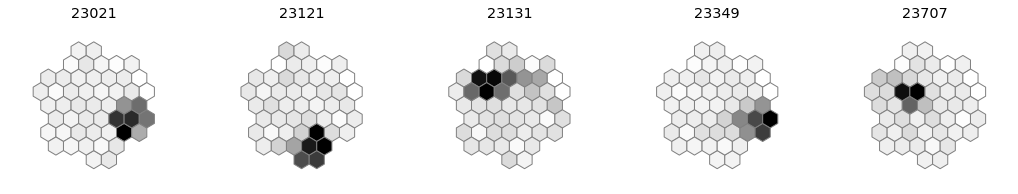

In [304]:
fig, axn = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(18,3))
for i in range(5):
    axn[i].axis([xmin, xmax, ymin, ymax])
    axn[i].axes.get_xaxis().set_visible(False)
    axn[i].axes.get_yaxis().set_visible(False)
    axn[i].set_title(title[i]) 
    
    amp = []
    for ch in range(len(N)):
        #print(i,ch,N[ch]-1, suma[i][N[ch]-1])
        amp.append( suma[i][N[ch]-1])
        
    #hb = axn[i].hexbin(x, y, C=np.log10(amp),gridsize=(10,6), 
    hb = axn[i].hexbin(x, y, C=amp,gridsize=8, 
                       cmap="gist_yarg", edgecolor='gray',                
                #cbar_ax  = None if i else cbar_ax,
                #cbar_kws = None if i else cbar_kws
                )   

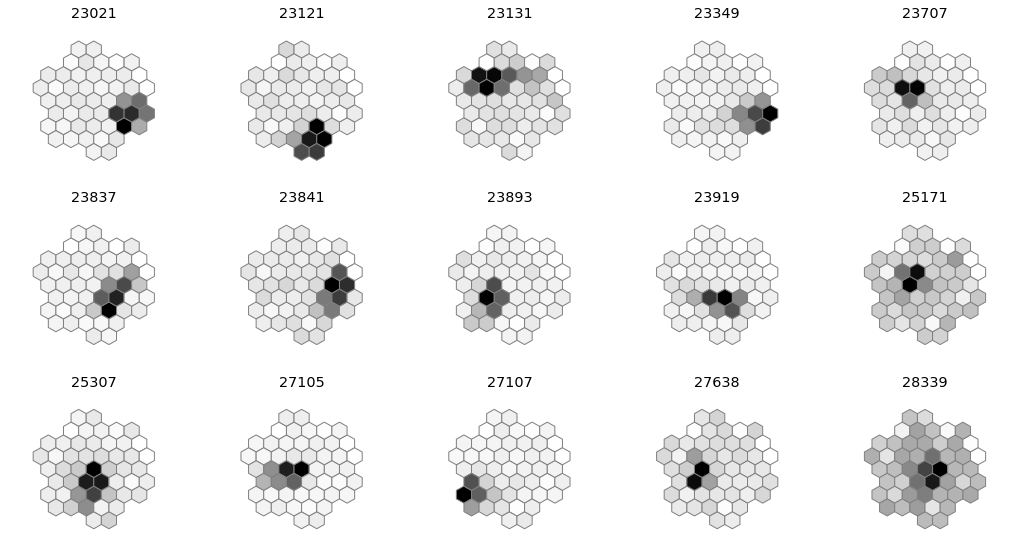

In [311]:
''' линейные амплитуды в серой гамме '''
fig, axn = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(18, 3.2*b))

for i in range(nn):
    axn[i//a][i%a].axis([xmin, xmax, ymin, ymax])
    axn[i//a][i%a].axes.get_xaxis().set_visible(False)
    axn[i//a][i%a].axes.get_yaxis().set_visible(False)
    axn[i//a][i%a].set_title(title[i]) 
    
    amp = []
    for ch in range(len(N)):
        amp.append( suma[i][N[ch]-1])
        
    hb = axn[i//a][i%a].hexbin(x, y, C=amp,gridsize=8, 
                       cmap="gist_yarg", # vmin = 0.1, vmax=np.log(75)
                       edgecolor='gray'                
        )
    plt.savefig('eventsum_lin_gray.png',  bbox_inches='tight')

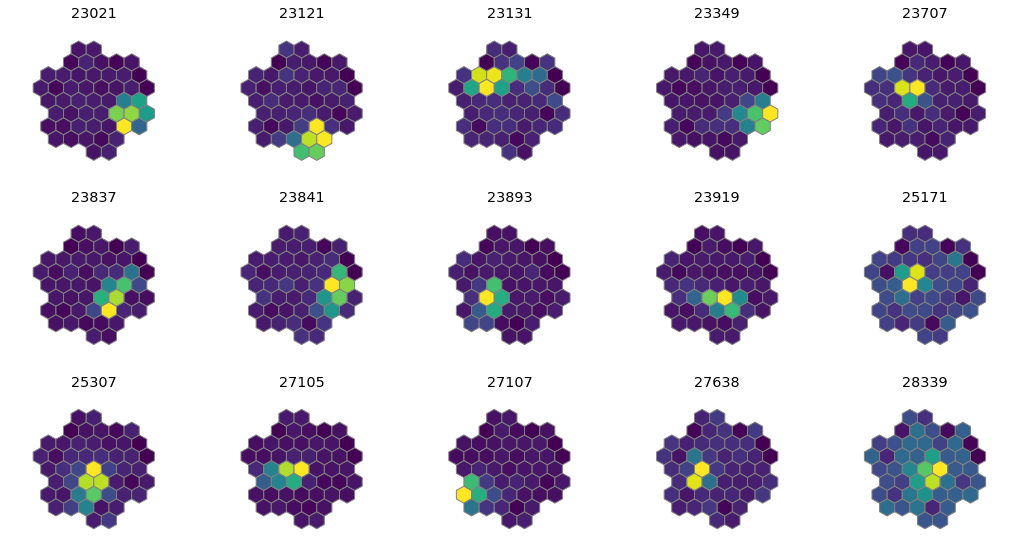

In [312]:
''' рисуем амплитуды в линейном масштабе '''
fig, axn = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(18, 3.2*b))

for i in range(nn):
    axn[i//a][i%a].axis([xmin, xmax, ymin, ymax])
    axn[i//a][i%a].axes.get_xaxis().set_visible(False)
    axn[i//a][i%a].axes.get_yaxis().set_visible(False)
    axn[i//a][i%a].set_title(title[i]) 
    
    amp = []
    for ch in range(len(N)):
        amp.append( suma[i][N[ch]-1])
        
    hb = axn[i//a][i%a].hexbin(x, y, C=amp,gridsize=8, 
                       #cmap="gist_yarg", # vmin = 0.1, vmax=np.log(75)
                       edgecolor='gray'                
        )
    plt.savefig('eventsum_lin_color.png',  bbox_inches='tight')

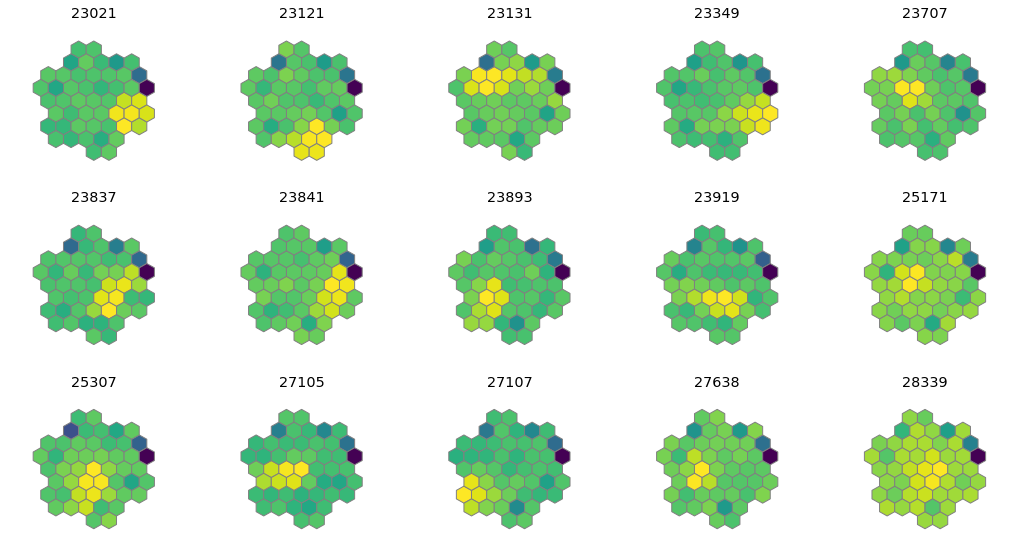

In [313]:
'''  построим логарифмы амплитуд '''
fig, axn = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(18, 3.2*b))

for i in range(nn):
    axn[i//a][i%a].axis([xmin, xmax, ymin, ymax])
    axn[i//a][i%a].axes.get_xaxis().set_visible(False)
    axn[i//a][i%a].axes.get_yaxis().set_visible(False)
    axn[i//a][i%a].set_title(title[i]) 
    
    amp = []
    for ch in range(len(N)):
        amp.append( suma[i][N[ch]-1])
       
    hb = axn[i//a][i%a].hexbin(x, y, C=np.log(amp), gridsize=8, 
                       #cmap="gist_yarg", # vmin = 0.1, vmax=np.log(75)
                       edgecolor='gray'                
        )        
    #for i in range(len(N)):
        #plt.text(x[i], y[i], str(N[i]), ha='center', va='center')
    plt.savefig('eventsum_log_color.png',  bbox_inches='tight')

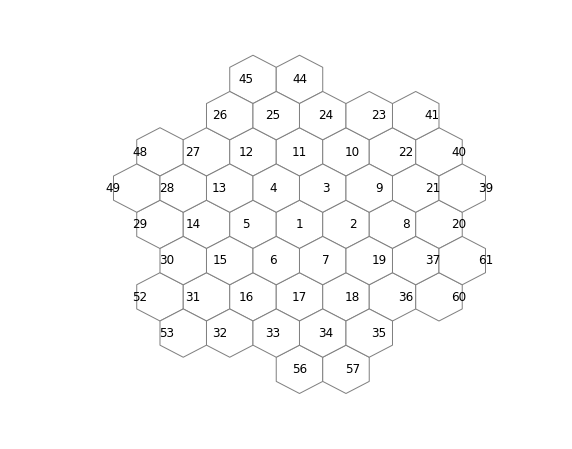

In [287]:
# выполнить ДВА раза, чтобы линии исчезли
fig = plt.figure(figsize=(10,8))
ax2 = plt.subplot()
cmap = colors.ListedColormap(['white', 'yellow', 'orange'])

xmin = min(x)-3
xmax = max(x)+3
ymin = min(y)-1
ymax = max(y)+1

hb = ax2.hexbin(x, y, C, gridsize=(8,4), cmap=cmap, edgecolor='gray' )
for i in range(len(N)):
    plt.text(x[i], y[i], str(N[i]), ha='center', va='center')

ax2.axis([xmin-1, xmax, ymin, ymax])
#cur_axes = plt.gca()
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
plt.rcParams['axes.linewidth'] = 0.0
plt.rcParams['font.size'] = 14